<a href="https://colab.research.google.com/github/taufiqyfirdaus/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):
    #menambahkan padding menggunakan numpy.pad
    #dokumentasi numpy.pad bisa dilihat di: https://numpy.org/doc/stable/reference/generated/numpy.pad.html
    image = np.pad(image,padding, mode='constant', constant_values=0)

    #mengambil nilai width & height dari kernel dan citra masukan yang sudah ditambahkan pad
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    """
    Menentukan ukuran output dari proses konvolusi menggunakan rumus:
        [(W−K+2P)/S]+1.
    W: ukuran citra input (width / height)
    K: ukuran kernal ((width / height))
    P: nilai padding
    S: nilai stride
    """
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    #proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    return new_image

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
#emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])
#canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
#left Sobel filter
kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
#prewitt filter
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
#prewitt filter
kernel_roberts = np.array([[-1,0],
                           [0,1]])
#box blur
kernel_box = (1 / 9.0) * np.array([[1, 1, 1],
                                   [1, 1, 1],
                                   [1, 1, 1]])
#3x3 gaussian blur
kernel_gaussian3 = (1/16.0)*np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
# Gaussian Blur 5x5
kernel_gaussian5 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Gaussian Blur 21x21
kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
#note: hasil cv.getGaussianKernel adalah matriks 1D, untuk mengubahnya jadi 2D harus dikalikan dengan transposenya
# @ digunakan untuk perkalian matriks

"""kernel_gaussian21 = np.array(([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000001, 0.000001, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000014, 0.000055, 0.000088, 0.000055, 0.000014, 0.000001, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000001, 0.000036, 0.000362, 0.001445, 0.002289, 0.001445, 0.000362, 0.000036, 0.000001, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000014, 0.000362, 0.003672, 0.014648, 0.023204, 0.014648, 0.003672, 0.000362, 0.000014, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000055, 0.001445, 0.014648, 0.058433, 0.092564, 0.058433, 0.014648, 0.001445, 0.000055, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000088, 0.002289, 0.023204, 0.092564, 0.146632, 0.092564, 0.023204, 0.002289, 0.000088, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000055, 0.001445, 0.014648, 0.058433, 0.092564, 0.058433, 0.014648, 0.001445, 0.000055, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000014, 0.000362, 0.003672, 0.014648, 0.023204, 0.014648, 0.003672, 0.000362, 0.000014, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000001, 0.000036, 0.000362, 0.001445, 0.002289, 0.001445, 0.000362, 0.000036, 0.000001, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000014, 0.000055, 0.000088, 0.000055, 0.000014, 0.000001, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000001, 0.000001, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0]]),np.float32)"""
#low pass filter
kernel_low = (1/12.0)*np.array([[1,1,1],
                                [1,4,1],
                                [1,1,1]])
#high pass filter
kernel_high = np.array([[-1,0,1],
                        [-1,0,3],
                        [-3,0,1]])

#menyimpan semua kernel pada array
kernels = [kernel_sharpen, kernel_emboss, kernel_canny, kernel_sobel, kernel_prewitt, kernel_roberts,
           kernel_box, kernel_gaussian3, kernel_gaussian5, gauss_kernel, kernel_low, kernel_high]
kernel_name = ['Sharpen', 'Emboss', 'Canny Edge Detection',
               'Left Sobel Edge Detection', 'Prewitt Edge Detection', 'Roberts Edge Detection', 'Box Blur', '3x3 Gaussian Blur',
               '5x5 Gaussian Blur', '21x21 Gaussian Blur', 'Low Pass Filter', 'High Pass Filter']

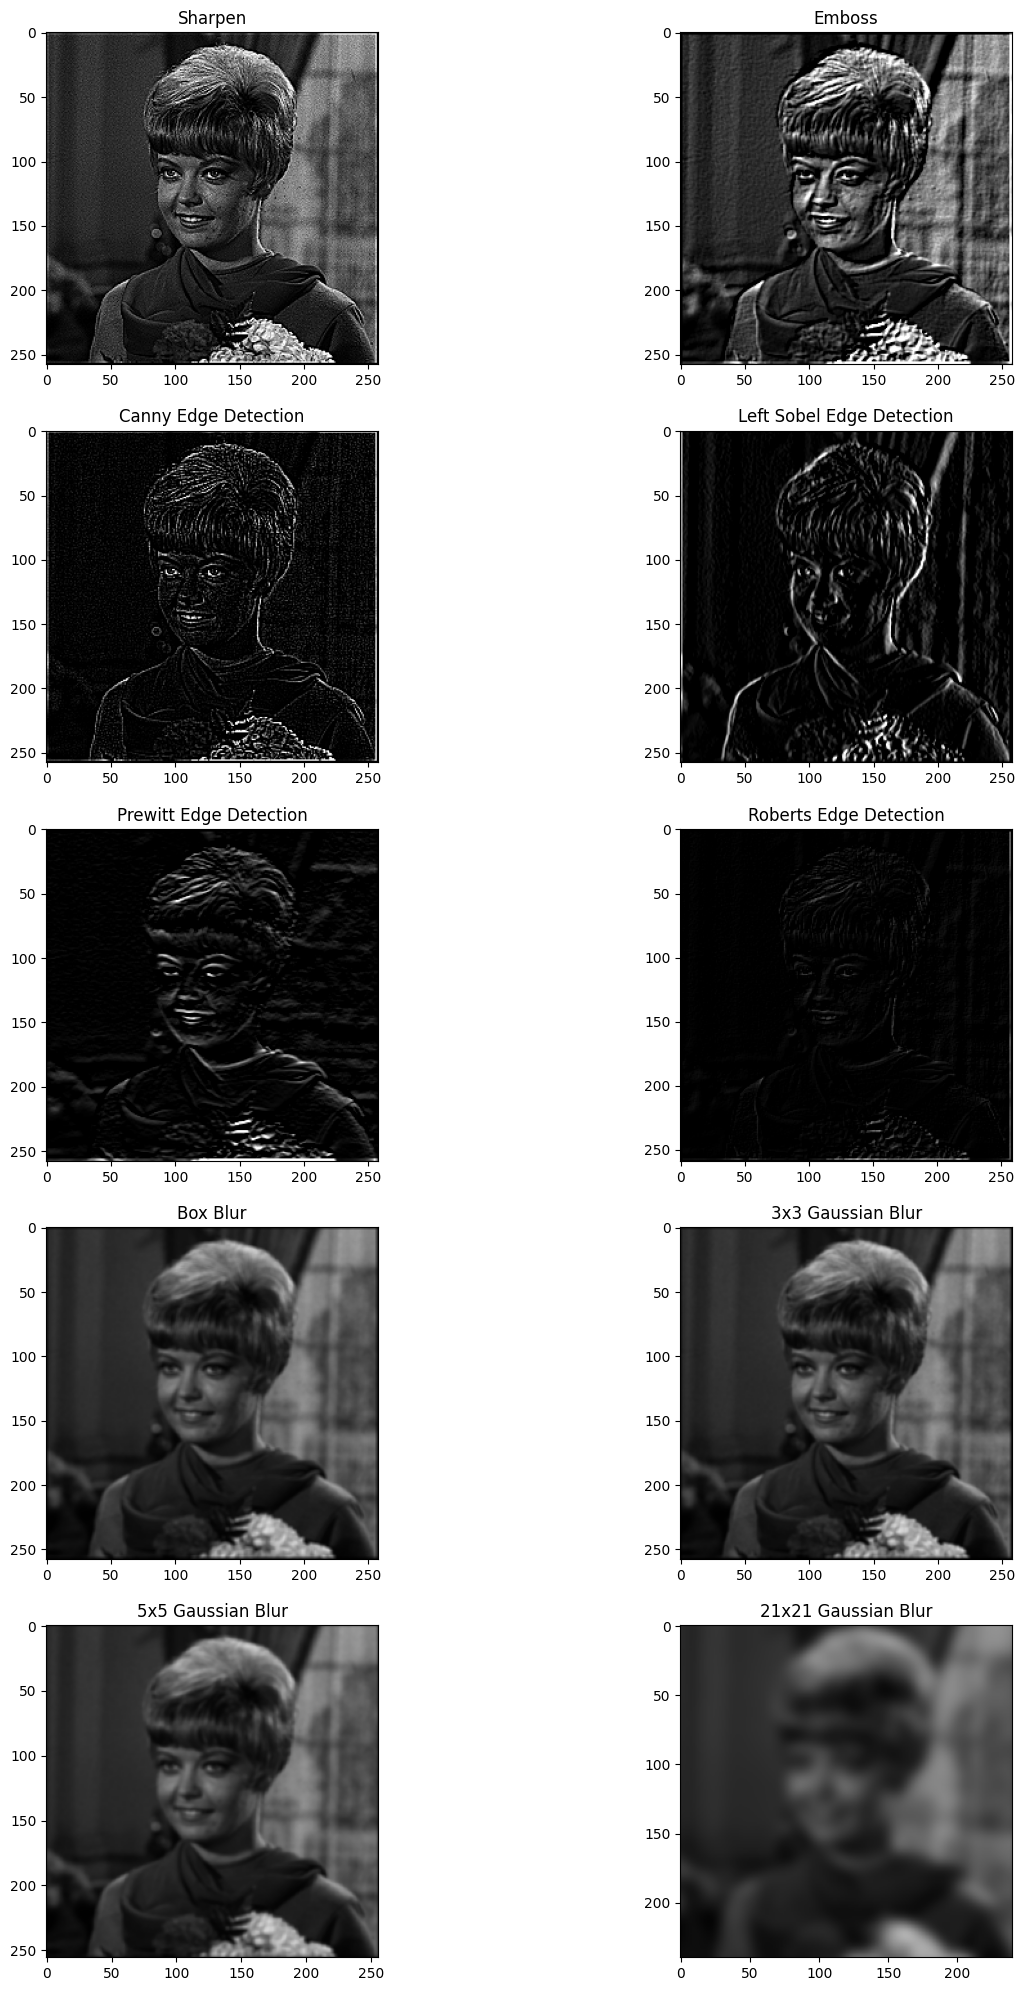

In [ ]:
figure, axis = plt.subplots(5,2, figsize=(15,25))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_image=im.fromarray(convolution2d(img_gray,kernel[::-1, ::-1],1,2))
     ax.imshow(conv_image)
     ax.set_title(name)

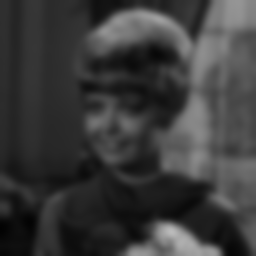

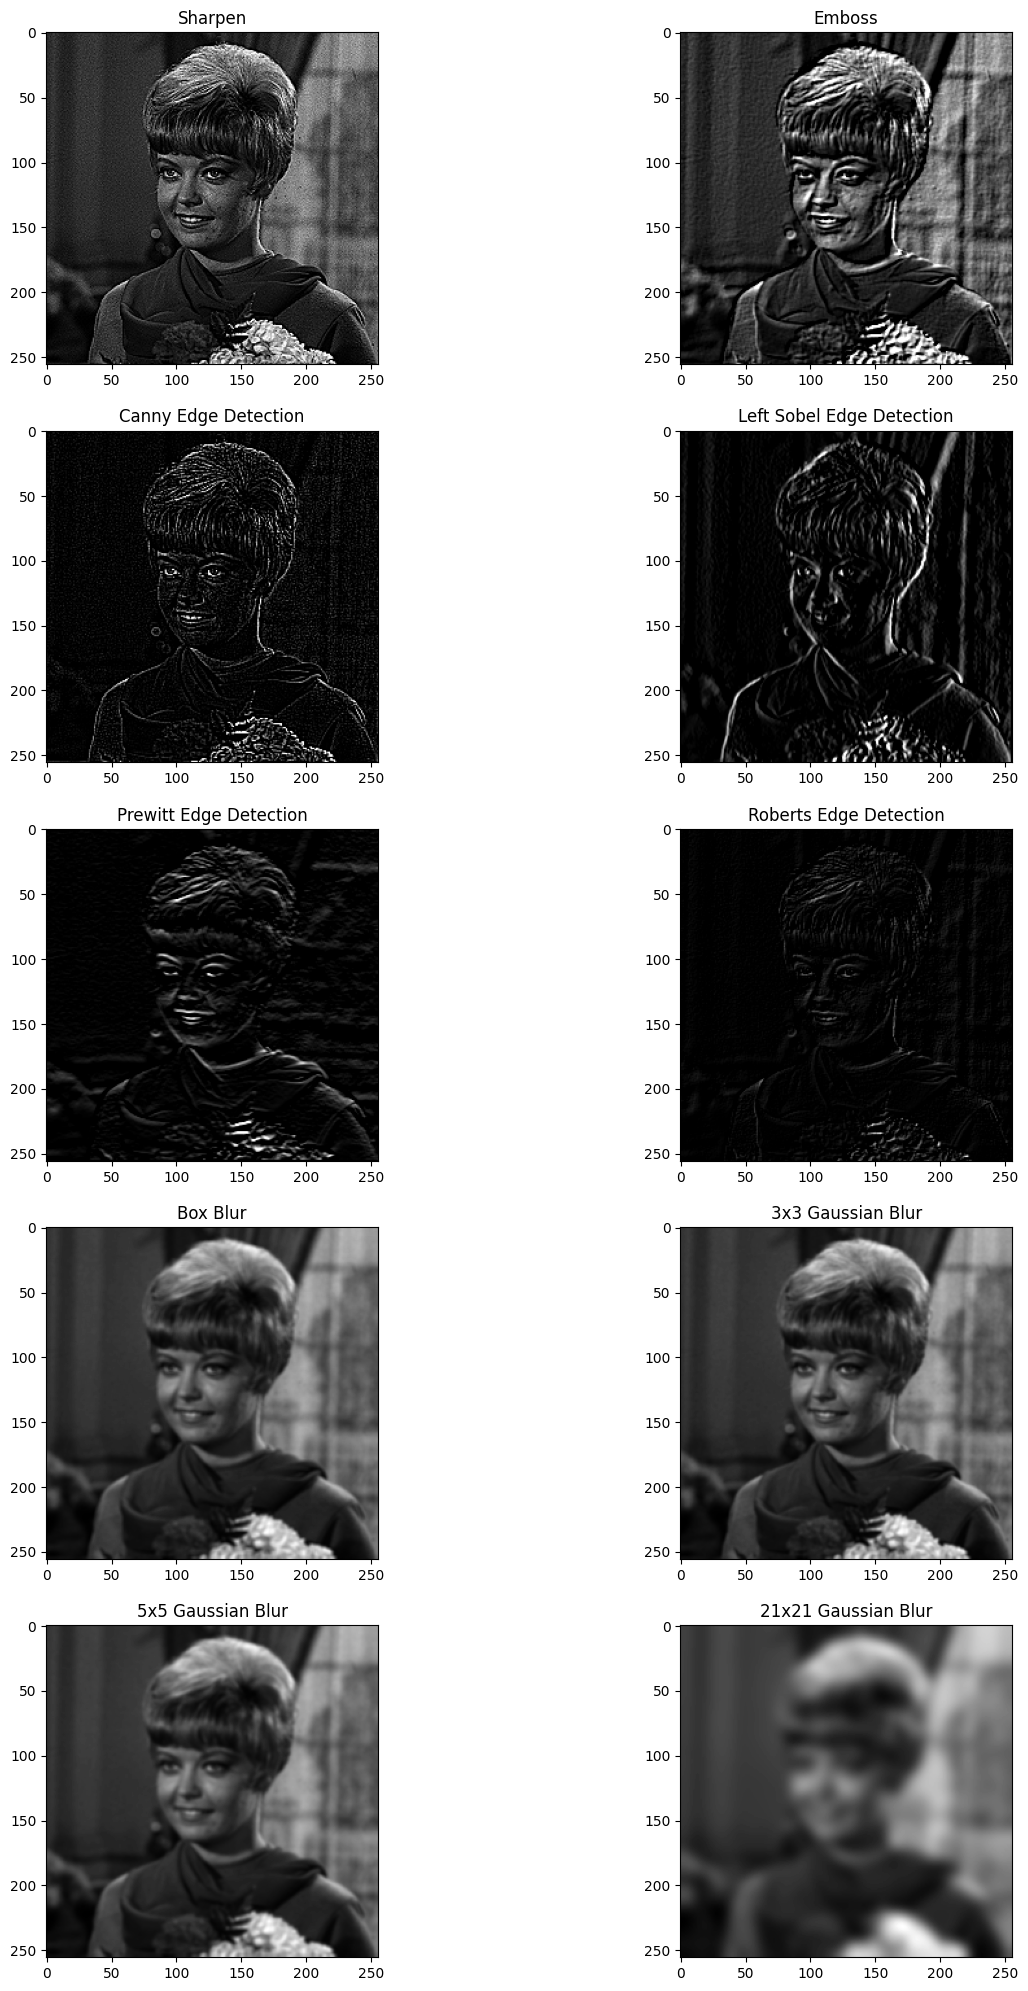

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

figure, axis = plt.subplots(5,2, figsize=(15,25))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_image=im.fromarray(cv.filter2D(img_color, -1, kernel[::-1, ::-1]))
     ax.imshow(conv_image,cmap='gray')
     ax.set_title(name)

#fungsi gaussian blur dari opencv
blur = cv.GaussianBlur(img_color,(21,21),0)
cv2_imshow(blur)